In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


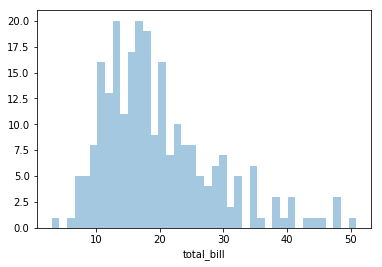

In [14]:
sns.distplot(tips['total_bill'], kde = False, bins = 40)

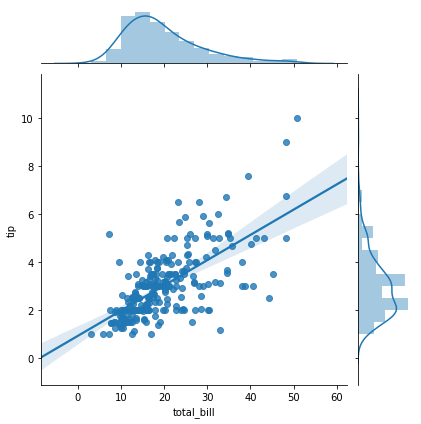

In [19]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

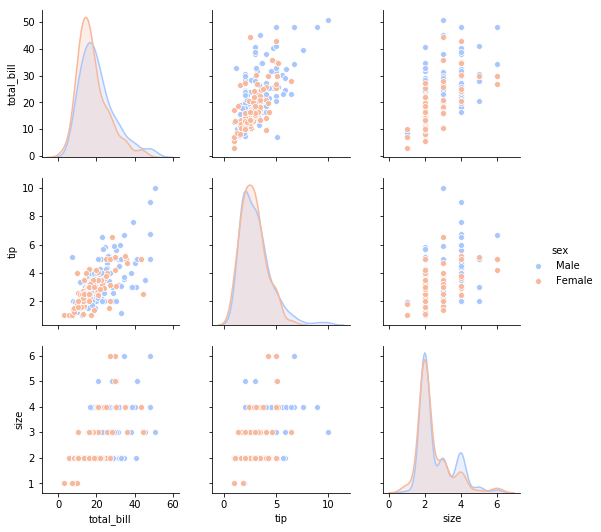

In [22]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')

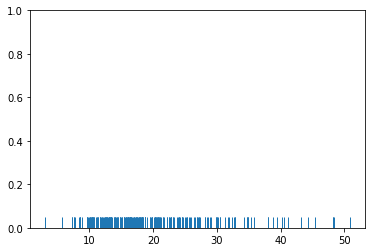

In [23]:
sns.rugplot(tips['total_bill'])

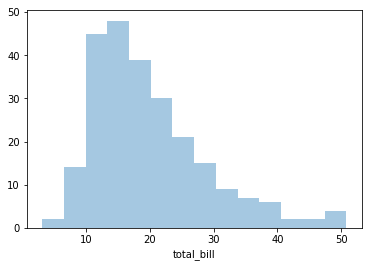

In [24]:
sns.distplot(tips['total_bill'], kde = False)

In [25]:
# KDE = kernal density estimation plots

(0, 1)

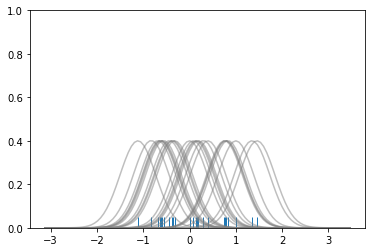

In [26]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

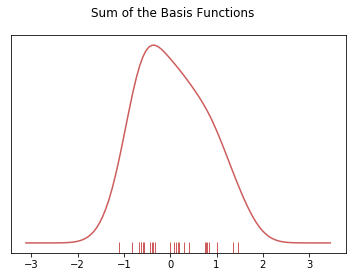

In [27]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [28]:
# KDE is basically a sum of all the normal distributions in a dataset

In [33]:
import numpy as np

In [29]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


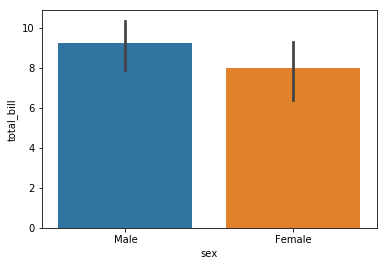

In [34]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

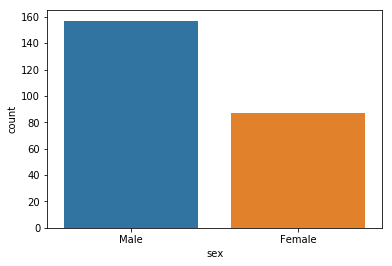

In [35]:
sns.countplot(x = 'sex', data = tips)

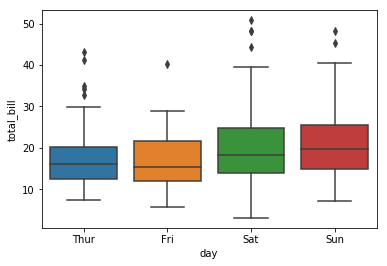

In [38]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

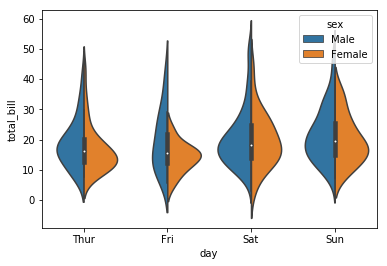

In [43]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

In [40]:
# Violin actually shows the distribution of the points as well as the box plots

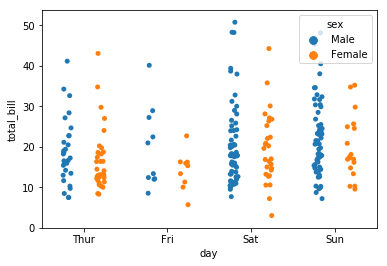

In [49]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex', dodge = True)

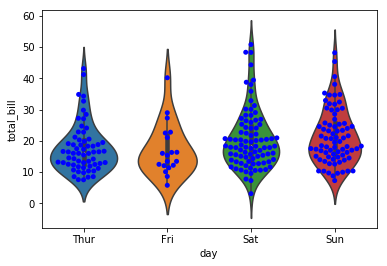

In [53]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'blue')

In [51]:
# dont use swarm plots for larger datasets

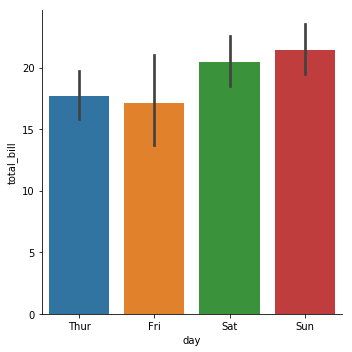

In [55]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

In [56]:
# Cat plot allows you to call different types of plots

In [57]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [58]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [60]:
tc = tips.corr()

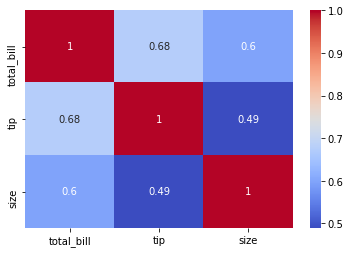

In [64]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [68]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')

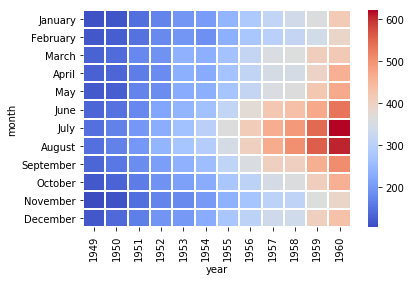

In [73]:
sns.heatmap(fp, cmap = 'coolwarm', linecolor = 'white', lw = 1)

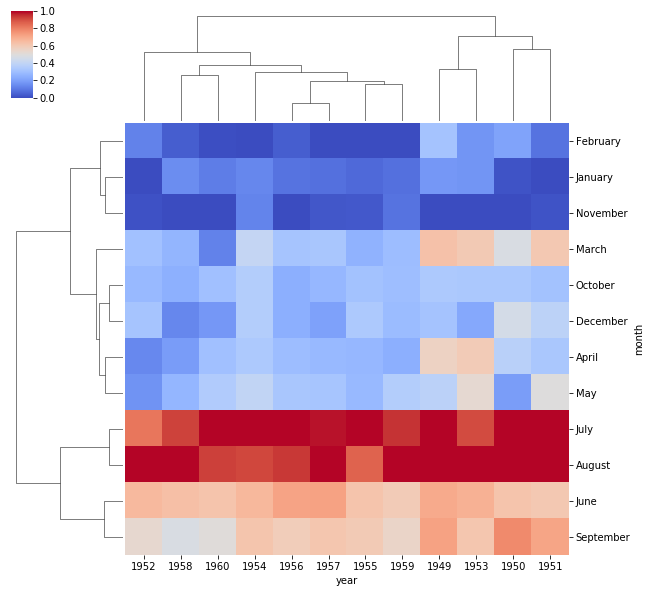

In [76]:
sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)

In [77]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [78]:
iris = sns.load_dataset('iris')

In [79]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [81]:
iris.pivot_table(index = 'species', columns = 'petal_width', values = 'sepal_length')

petal_width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
species,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,...,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


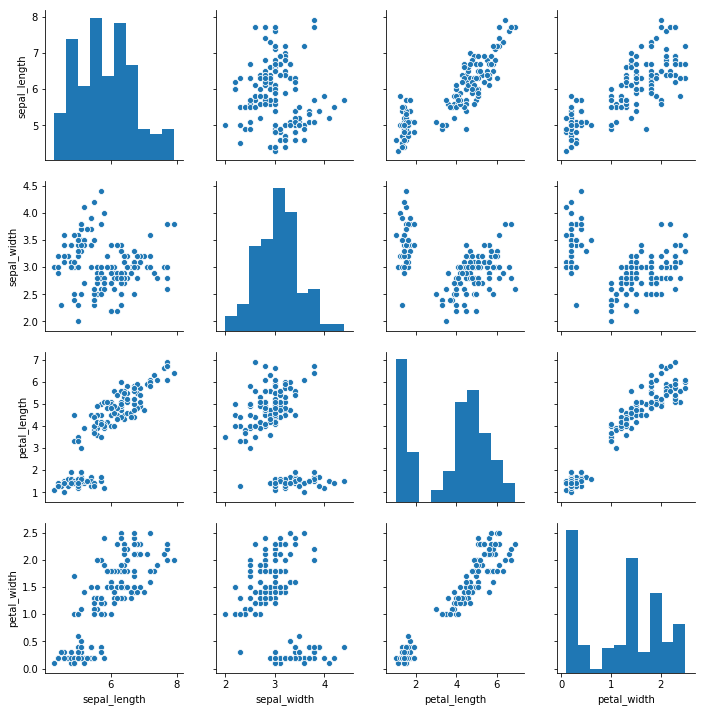

In [82]:
sns.pairplot(iris)

In [94]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


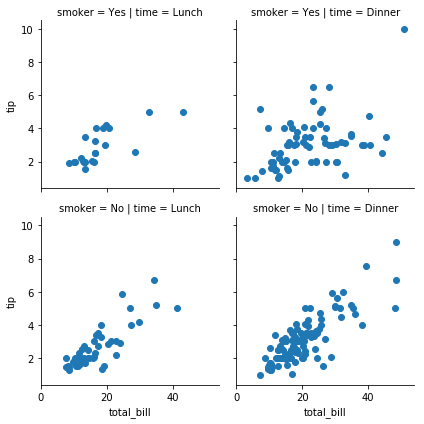

In [92]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip')

In [95]:
import seaborn as sns

In [96]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


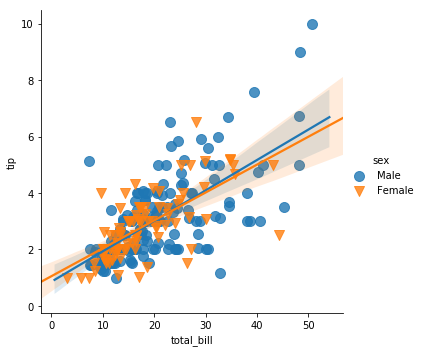

In [103]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'], 
          
          scatter_kws = {'s': 100})

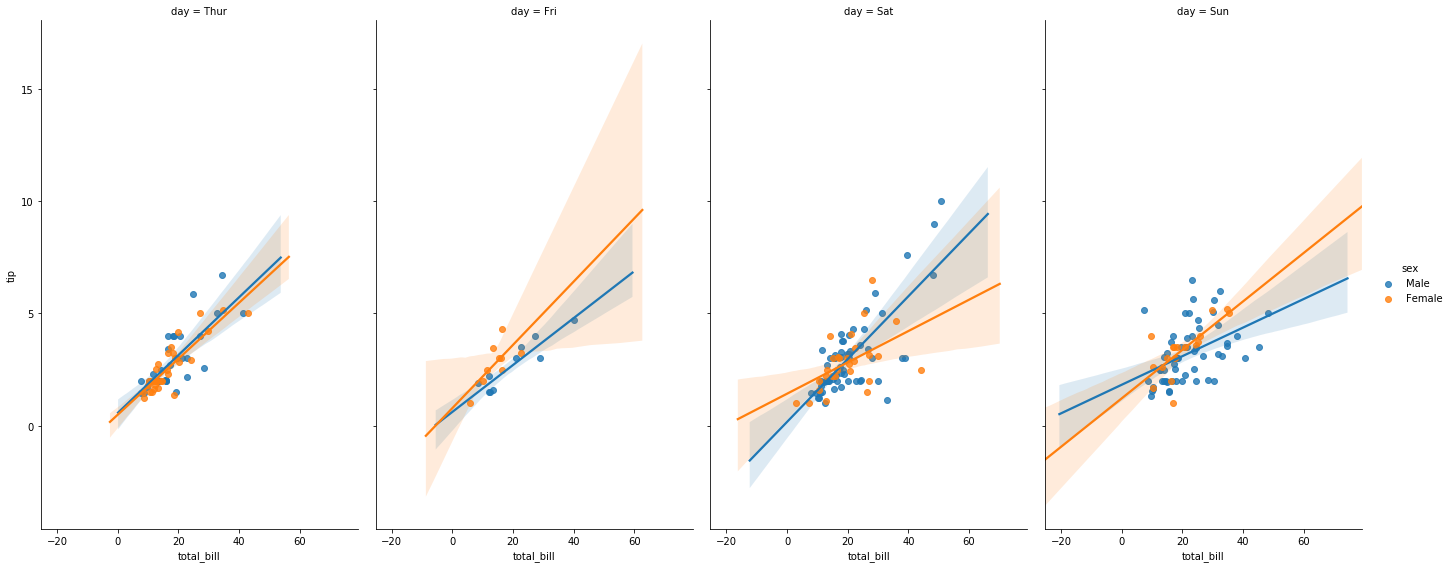

In [110]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex', 
          aspect = 0.6, height = 8)

In [111]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


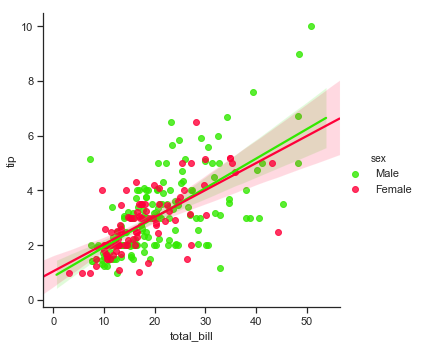

In [130]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', 
          palette = 'prism')